In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv('../data_sets/titanic.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.set_index(['PassengerId'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [25]:
datadict = pd.DataFrame(data.dtypes)

In [26]:
datadict['MissingVal'] = data.isnull().sum()

In [28]:
datadict['UniqueVal'] = data.nunique()
datadict['Count']=data.count()
datadict

,0,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,0,89,891
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [29]:
datadict = datadict.rename(columns={0:'DataType'})

In [31]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

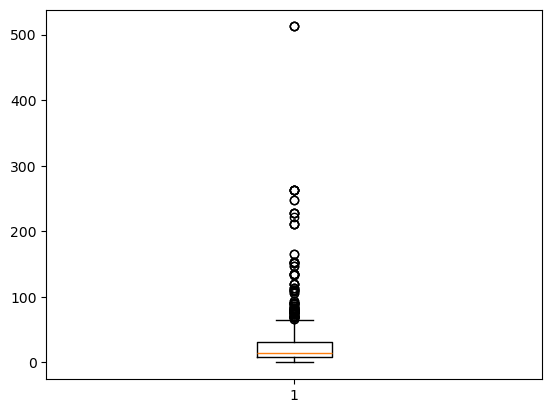

In [38]:
plt.boxplot(data['Fare'])
plt.show()

In [39]:
# check for missing values in each volumn
missing_data = data.isnull().sum()

# calculate the percentage of missing values
missing_percentage = (missing_data/len(data)) * 100

# combine missing data count and missing percentage
missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Missing Percentage': missing_percentage
})

# Filter columns with missing data
missing_info = missing_info[missing_info['Missing Values']>0]

# Format the 'Missing Percentage' column to add a '%' symbol
missing_info['Missing Percentage'] = missing_info['Missing Percentage'].apply(lambda x: f"{x:.2f}%")

# Display the columns with missing data and their percentage
print(missing_info)

          Missing Values Missing Percentage
Cabin                687             77.10%
Embarked               2              0.22%


In [41]:
data['Embarked'].nunique()

3

In [42]:
data = pd.get_dummies(data, columns=['Embarked'], prefix='Embarked')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


In [45]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

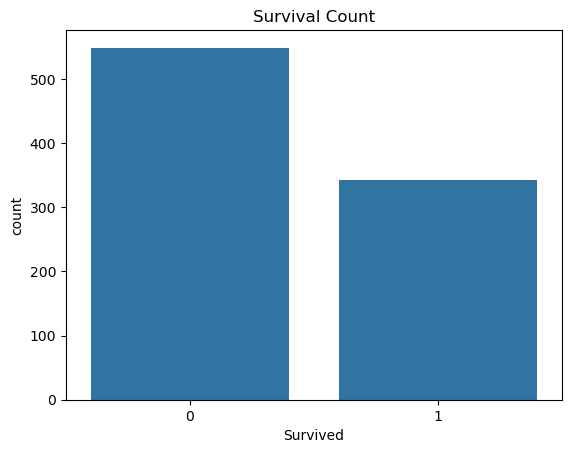

In [48]:
import seaborn as sns

sns.countplot(data=data, x='Survived')
plt.title('Survival Count')
plt.show()

In [49]:
!pip install plotly

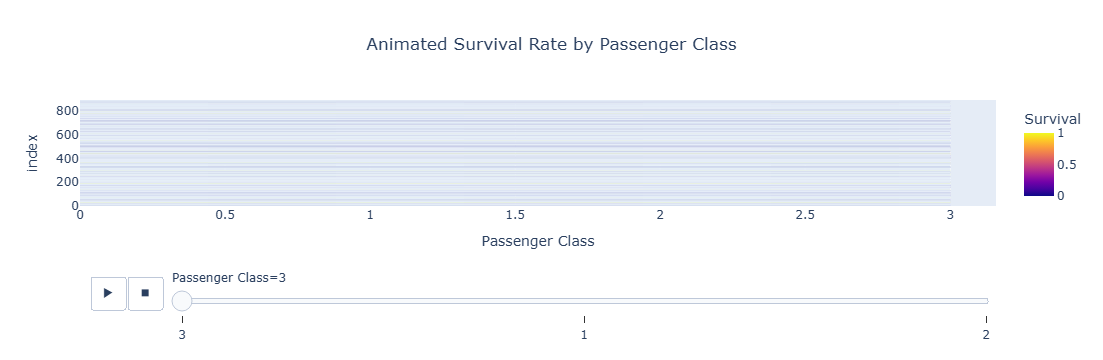

In [53]:
import plotly.express as px

fig_animated_class = px.bar(data, x='Pclass', color='Survived', barmode='group', animation_frame='Pclass', labels={'Pclass': 'Passenger Class','Survived':'Survival'},title="Animated Survival Rate by Passenger Class")
fig_animated_class.update_layout(title_x=0.5)
fig_animated_class.show()

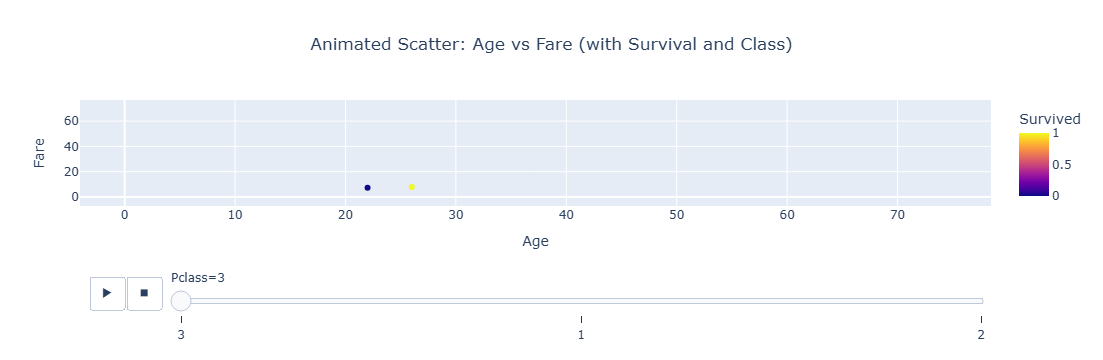

In [54]:
fig_animated_scatter = px.scatter(data, x='Age', y='Fare', color='Survived', animation_frame='Pclass', animation_group='Survived',
                                  labels={'Age':'Age','Fare':'Fare'},
                                  title='Animated Scatter: Age vs Fare (with Survival and Class)')
fig_animated_scatter.update_layout(title_x=0.5)
fig_animated_scatter.show()

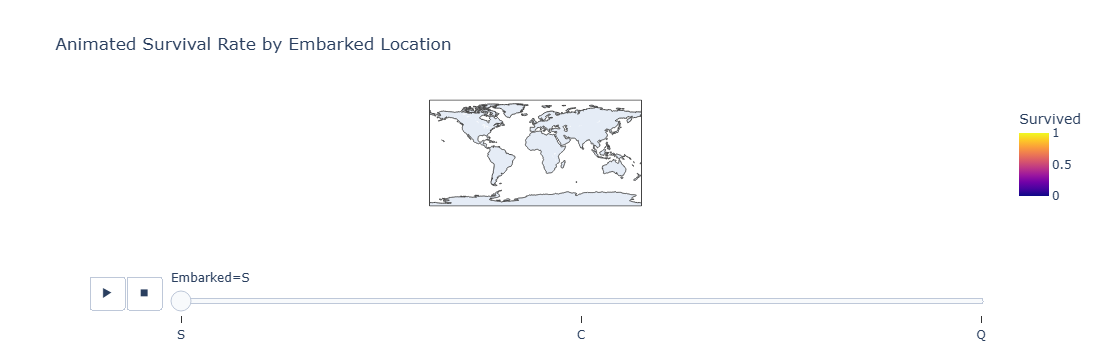

In [59]:
embarked_location_map = {
    'C': 'Cherbourg, France',
    'Q': 'Queenstown, Ireland',
    'S': 'Southampton, UK'
}
data['Embarked Location'] = data['Embarked'].map(embarked_location_map)

fig_choropleth = px.choropleth(data, locations='Embarked Location', color='Survived', hover_name = 'Embarked Location',
                               animation_frame='Embarked', title='Animated Survival Rate by Embarked Location')
fig_choropleth.show()